## Graphic utilities - single map

AQUA is not providing a full set of tools for visualization. Other excellent packages can be used and are used by our diagnostics to represent data.

Anyway a simple utility to plot a map is provided. It is based on the cartopy package, together with matplotlib.

In [12]:
from aqua import Reader, plot_single_map

Let's load some example data:

In [32]:
reader = Reader(model="IFS-NEMO", exp="a1si", source="monthly-r100s-atm2d")

2024-11-15 13:21:58 :: Reader :: WARNING  -> realization parameter is required but is missing, setting to default 1


In [33]:
data = reader.retrieve()

In [24]:
data

<xarray.Dataset> Size: 1GB
Dimensions:    (lon: 360, lat: 181, time: 108)
Coordinates:
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 864B 1990-01-01 1990-02-01 ... 1998-12-01
Data variables: (12/21)
    mtsfr      (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    msshf      (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    mslhf      (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    msl        (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    tcc        (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    10u        (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    ...         ...
    mtnswrfcs  (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    mtnlwrfcs  (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    msnswrfcs  (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    msnlwrfcs  (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    mtdwswrf   (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    mtpr       (time, lat, lon) float64 56MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-11-15 13:17:40 AQUA💧: Retrieved from IFS-NEMO_a1si_month...

We now load `avg_tos`, i.e., time-mean sea surface temperature

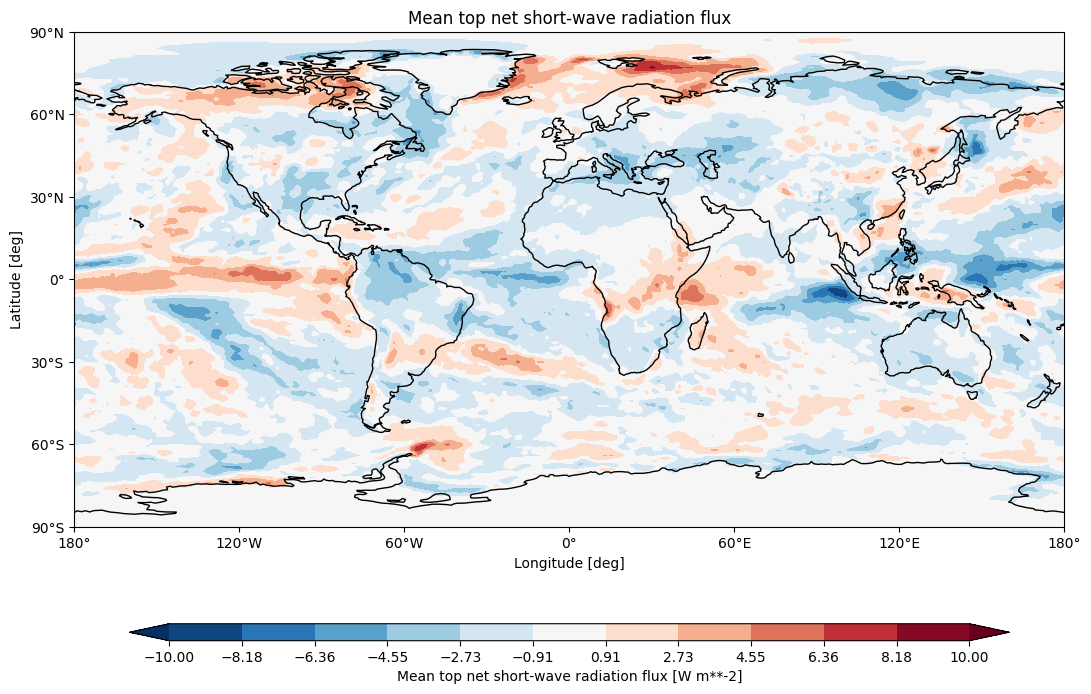

In [ ]:
avg_tos = data["mtnswrf"]
yearly = avg_tos.aqua.timmean(freq='yearly')
first_three = yearly.isel(time=[2,3,4])
# avg_tos_plot = yearly.isel(time=2) - avg_tos.aqua.timmean()
avg_tos_plot = first_three.aqua.timmean() - avg_tos.aqua.timmean()

avg_tos_plot.aqua.plot_single_map(vmin=-10,vmax=10)
# CONFESS

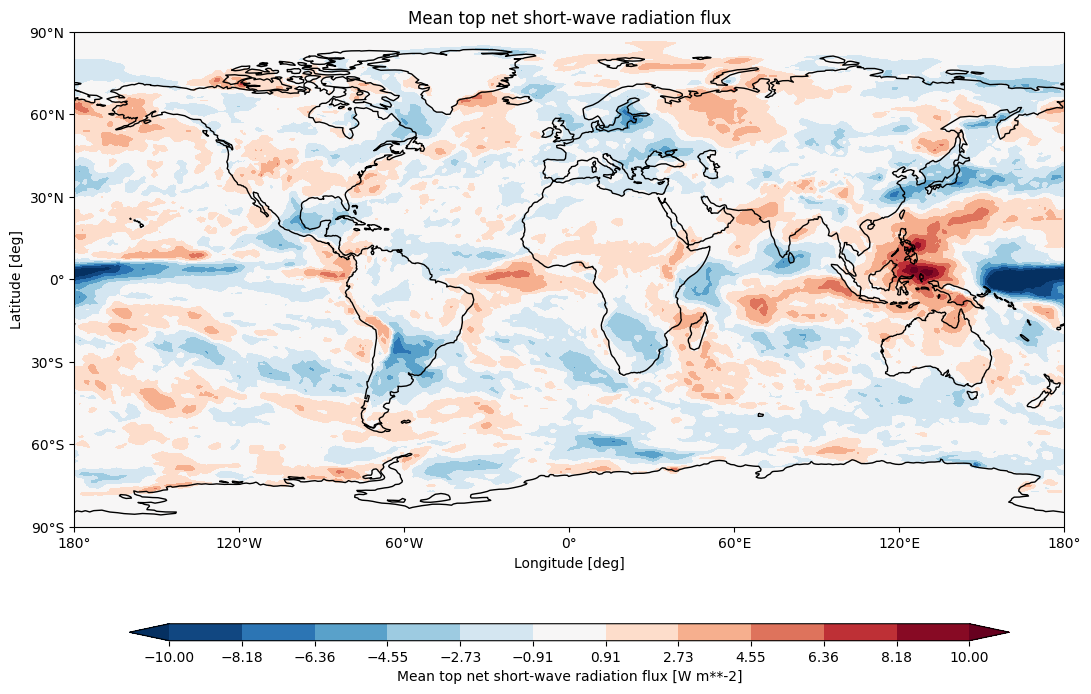

In [34]:
avg_tos = data["mtnswrf"]
yearly = avg_tos.aqua.timmean(freq='yearly')
first_three = yearly.isel(time=[2,3,4])
# avg_tos_plot = yearly.isel(time=2) - avg_tos.aqua.timmean()
avg_tos_plot = first_three.aqua.timmean() - avg_tos.aqua.timmean()

avg_tos_plot.aqua.plot_single_map(vmin=-10,vmax=10)

## Simple map plot

In [55]:
plot_single_map(avg_tos_plot, vmin=-50,vmax=50)

If nothing but the data is provided, the utility will plot the data on a map and adapt colorbar, title, etc. to the data.
The function is loading data in memory and applying a check if lon data have an empty central point to be fixed.

A custom title can be provided:

In [7]:
plot_single_map(avg_tos_plot, title="Example of a custom title")

The function can also save the plot with a custom filename and output directory, with custom format (the format will be added automatically) and dpi.
The save function has to be enabled with `save=True`:

In [8]:
plot_single_map(avg_tos_plot, title="Example of a custom title", filename="example", outputdir=".", format="png", dpi=300, save=True)

The minimum and maximum values can be provided and the possibility to choose to symmetrize the colorbar around zero is available.
If the symmetrize option is enabled, the minimum and maximum values are ignored if provided:

In [9]:
plot_single_map(avg_tos_plot, vmin=250, vmax=320, loglevel="DEBUG")

As can be seen above contourplot is the standard representation (a number of levels can be provided), but pcolormesh is also available:

In [10]:
plot_single_map(avg_tos_plot, contour=False)

It is also possible to change colormap and add gridlines:

In [11]:
plot_single_map(avg_tos_plot, cmap="gnuplot", gridlines=True)

## Maps and bias

The single map tool can be used to plot also biases. A function called `plot_single_map_diff` is provided, built on top of the previous function introduced here.
It will automatically plot the data as contour (not filled) map and the difference between the data and a reference set as contour filled map.

In [12]:
from aqua import plot_single_map_diff

Let's now plot the single timestep we have selected for the plot above and let's decide that we want to compare ito a slice of data.

In [13]:
avg_ref = data["avg_tos"].isel(time=slice(0, 12)).mean("time")

In [14]:
plot_single_map_diff(data=avg_tos_plot, data_ref=avg_ref, title="Slice vs mean")

Since the function is built for bias maps all the settings for the color map are with the symmetry option on by default, but other options are available.

## Area selection for a plot

It is possible to use the function and the utilities to plot a specific area of the globe.
The function to perform the area selection is available in the `utils` module.
Let's focus on the Nina3.4 region:

In [15]:
from aqua.util import area_selection

In [16]:
# Nino 3.4 region
lon_lim = (-170, -120)
lat_lim = (-5, 5)

avg_tos_sel = area_selection(avg_tos_plot, lon=lon_lim, lat=lat_lim)

We can analyze the data in the region. The area selection function by default is not dropping the data outside the region, so that a simple call to the plotting function will plot the data in the region and white elsewhere:

In [17]:
plot_single_map(avg_tos_sel, title='sst in the Nino 3.4 region')

We need to drop the value outside the region. This can be done with the `drop=True` parameter in the area selection function:

In [18]:
avg_tos_sel_box = area_selection(avg_tos_plot, lon=lon_lim, lat=lat_lim, drop=True)
avg_tos_sel_box

We unset the figsize to use the default one and we change the number of standard yticks.

In [19]:
plot_single_map(avg_tos_sel_box, title='sst in the Nino 3.4 region', figsize=(12,4), nyticks=5, vmin=300, vmax=302)